In [202]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [203]:
import pickle

with open(r"metrics_diff_models_train.pkl", "rb") as f:
    metrics_train = pickle.load(f)

def transfer_dict_to_array(metrics_dict):
    new_dict = {}
    new_dict["name"] = metrics_dict["name"]
    new_dict["path"] = metrics_dict["path"]
    for k,v in metrics_dict["metrics"][0].items():
        new_dict[k] = [m[k] for m in metrics_dict["metrics"]]
    return new_dict

metrics_train_new = [transfer_dict_to_array(i) for i in metrics_train]

with open(r"roc_curve_baseline_training.pkl", "rb") as f:
    roc_basline_train = pickle.load(f)

roc_basline_train["TPR"] = roc_basline_train["tpr"][::-1]
roc_basline_train["FPR"] = roc_basline_train["fpr"][::-1]
roc_basline_train["name"] = "Baseline"
print(roc_basline_train["tpr"])

[0.         0.         0.         ... 0.99973726 1.         1.        ]


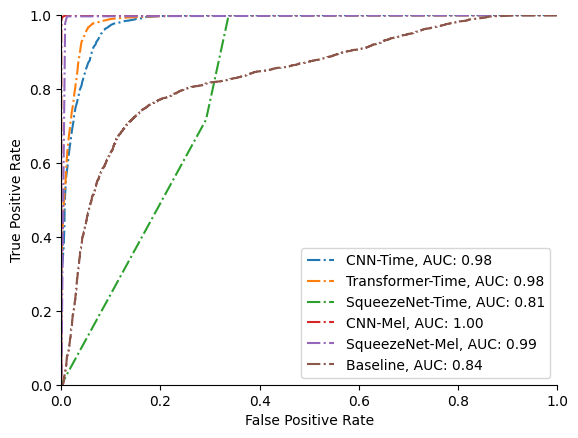

In [204]:
import matplotlib.pyplot as plt
from sklearn import metrics
plt.style.use('default')
model_name = ["CNN-Time", "Transformer-Time", "SqueezeNet-Time", "CNN-Mel", "SqueezeNet-Mel", "Baseline"]
# line_type = 
i = 0
for m in [*metrics_train_new, roc_basline_train]:
    tpr = [*m["TPR"] ,0.0]
    fpr = [*m["FPR"] ,0.0]
    plt.plot(fpr,tpr,  label=model_name[i] + ", " + 'AUC: {0:.2f}'.format(metrics.auc(fpr, tpr)), 
             linestyle="dashdot", linewidth=1.5)
    i += 1
plt.legend(loc="lower right")
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
fig_roc = plt.gcf()
plt.show()
fig_roc.savefig("roc_train.pdf", bbox_inches='tight')

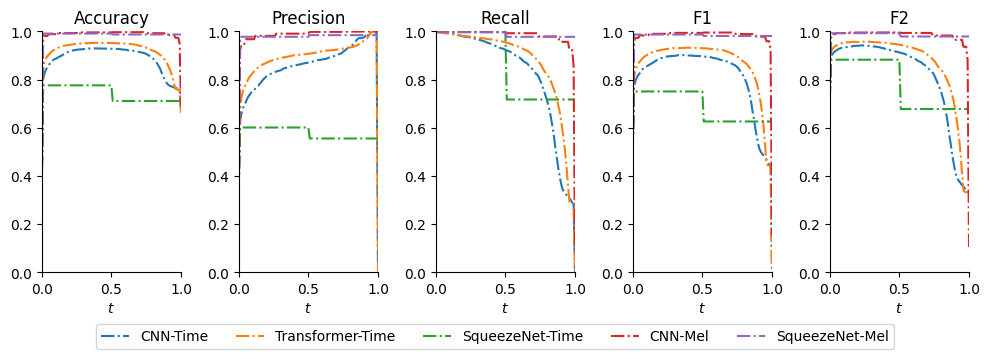

In [207]:
m_name = ["Accuracy", "Precision", "Recall", "F1", "F2"]
fig, axes = plt.subplots(1, len(m_name), figsize=(10, 3))
fig.tight_layout()
idx = 0
for name in m_name:
    i = 0
    for m in metrics_train_new:
        axes[idx].plot(m["t"], m[name],  label=model_name[i], linestyle="dashdot", linewidth=1.5)
        i += 1
#     axes[idx].legend(loc="lower right")
    axes[idx].set_ylim(0.0, 1.0)
    axes[idx].set_xlim(0.0, 1.0)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("$t$")
    axes[idx].spines[['right', 'top']].set_visible(False)
#     axes[idx].show()
    idx += 1
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc = "lower center", ncol=5, bbox_to_anchor=[0.5, -0.15])
fig.show()
fig.savefig("various_metrics_on_different_th_train.pdf", bbox_inches='tight')

In [121]:
with open(r"metrics_diff_models_test.pkl", "rb") as f:
    metrics_test = pickle.load(f)

metrics_test_new = [transfer_dict_to_array(i) for i in metrics_test]


In [122]:
import pandas as pd

In [152]:
met_df = pd.DataFrame.from_dict(metrics_train_new[0])
opt_f2_df = pd.DataFrame(columns = met_df.columns)

idx = 0

for m in metrics_train_new:
    met_df = pd.DataFrame.from_dict(m)
    opt_f2_df.loc[idx] = met_df.loc[met_df['F2'].idxmax()]
    idx += 1

In [153]:
print(opt_f2_df[["name", "t", "Accuracy", "Precision", "Recall", "F2"]].style.format(precision=2).to_latex())

opt_f2_df.iloc[0]["t"]

\begin{tabular}{lllllll}
 & name & t & Accuracy & Precision & Recall & F2 \\
0 & StreamingCNNTiny & 0.23 & 0.92 & 0.82 & 0.98 & 0.94 \\
1 & StreamingTransformer & 0.27 & 0.95 & 0.89 & 0.98 & 0.96 \\
2 & SqueezNet-Time-Series & 0.01 & 0.78 & 0.60 & 1.00 & 0.88 \\
3 & CNN-Mel-Spec & 0.27 & 1.00 & 0.99 & 1.00 & 1.00 \\
4 & SqueezNet-Mel-Spec & 0.01 & 0.99 & 0.98 & 1.00 & 0.99 \\
\end{tabular}



0.23

In [154]:
met_df_test = pd.DataFrame(columns = met_df.columns)
idx = 0

for m in metrics_test_new:
    df = pd.DataFrame.from_dict(m)
    t = opt_f2_df.iloc[idx]["t"]
    loc = df.index[df['t'] == t][0]
    
    met_df_test.loc[idx] = df.iloc[loc]
    idx += 1

In [156]:
print(met_df_test[["name", "t", "Accuracy", "Precision", "Recall", "F2"]].style.format(precision=2).to_latex())


\begin{tabular}{lllllll}
 & name & t & Accuracy & Precision & Recall & F2 \\
0 & StreamingCNNTiny & 0.23 & 0.94 & 0.86 & 0.98 & 0.95 \\
1 & StreamingTransformer & 0.27 & 0.93 & 0.90 & 0.91 & 0.91 \\
2 & SqueezNet-Time-Series & 0.01 & 0.79 & 0.61 & 1.00 & 0.88 \\
3 & CNN-Mel-Spec & 0.27 & 0.99 & 0.98 & 0.99 & 0.99 \\
4 & SqueezNet-Mel-Spec & 0.01 & 0.99 & 0.96 & 1.00 & 0.99 \\
\end{tabular}

